In [1]:
import cv2
import numpy as np
import matplotlib.ticker as tic
from prettytable import PrettyTable 
from matplotlib import pyplot as plt
from skimage import io, util, filters, metrics

In [2]:
# Формирование исходного сигнала
def signal(x):
    return 0.5 + 0.5*np.sin(frequency * x + phase)

In [3]:
def showImages(*args):
    fig, axes = plt.subplots(1, len(args))

    for i in range(len(axes)):
        axes[i].imshow(args[i], cmap="gray")
        axes[i].axis("off")

    fig.set_figwidth(10)    
    fig.set_figheight(10)  
    plt.show()

In [4]:
counts_num = 50 

# Функция дискретизации 
def sampling(s_frequancy):
    out = []
    x = 0
    while x < counts_num:
        y = signal(x)
        y1 = signal(x + s_frequancy)
        out.append(round((y + y1) / 2, 2))
        x += s_frequancy
    return np.array(out)

In [5]:
# Изменение размера - интерполяция методом ближайшего соседа
def interpolation(img, size):
    out = cv2.resize(img, size, cv2.INTER_NEAREST)
    return out

In [6]:
# Преобразование дискретных значений в изображение
def createImage(row): 
    row = np.around(255 * row)
    image = np.full((row.size, row.size), row)
    return image

In [7]:
# Функция квантования изображения
def quantization (image, low, high, l_num):
    levels = [] #Уровни квантования 
    while low <= high:
        levels.append(low)
        low += 1/l_num
    
    for i in range(len(image)):
        for j in range(len(image[i])):
            for k in range(len(levels)): 
                if image[i][j] < levels[k]: 
                    if image[i][j] < (levels[k-1] + levels[k]) / 2:
                        image[i][j] = levels[k-1]
                        break
                    else:
                        image[i][j] = levels[k]
                        break
    return image

In [8]:
# Случайный дизеринг
def random_dither(img):
    out = np.zeros(img.shape, dtype=np.uint8)
    noise = np.zeros(img.shape, dtype=np.uint8)
    noise = util.random_noise(noise, "gaussian", 3)
    
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] >= noise[i][j]:
                out[i][j] = 255
            else:
                out[i][j] = 0
    
    return out

In [9]:
# Упорядоченный дизеринг
def control_dither(img):
    out = np.zeros(img.shape, dtype=np.uint8)

    for i in range(0, len(img), 2):
        for j in range(0, len(img[i]), 2):
            if i + 2 >= len(img) or j + 2 >= len(img[i]): break
            mean = np.around((img[i][j] + img[i+1][j] + img[i][j+1] + img[i+1][j+1]) / 4, 2)
            if mean <= 0.25:
                out[i][j] = out[i+1][j] = out[i][j+1] = out[i+1][j+1] = 0    
            elif mean > 0.25 and mean <= 0.5:
                out[i][j] = 1
                out[i+1][j] = out[i][j+1] = out[i+1][j+1] = 0
            elif mean > 0.5 and mean <= 0.75:
                out[i][j] = out[i+1][j+1] = 1
                out[i+1][j] = out[i][j+1] = 0
            elif mean > 0.75 and mean <= 1:
                out[i][j] = out[i+1][j] = out[i][j+1] = out[i+1][j+1] = 1

    return out

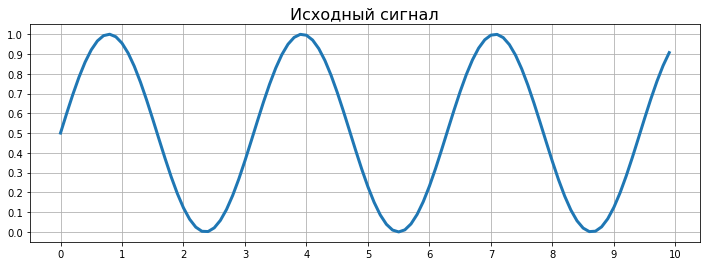

In [10]:
#@title #**Параметры сигнала** { run: "auto" }
frequency =  2#@param {type:"number"}
phase = 0 #@param ["0", "np.pi/4", "np.pi/2", "np.pi", "(np.pi * 3)/2"] {type:"raw"}

#функция генерации сигнала
x = np.arange(0, 10, 0.1)
y = 0.5 + 0.5*np.sin(frequency * x + phase)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 3)

#Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(tic.MultipleLocator(1))
ax.yaxis.set_major_locator(tic.MultipleLocator(0.1))

fig.set_figwidth(12)
fig.set_figheight(4)
plt.title("Исходный сигнал", fontsize=16)
plt.grid()
plt.show()

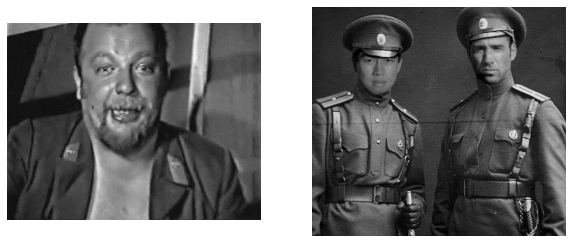

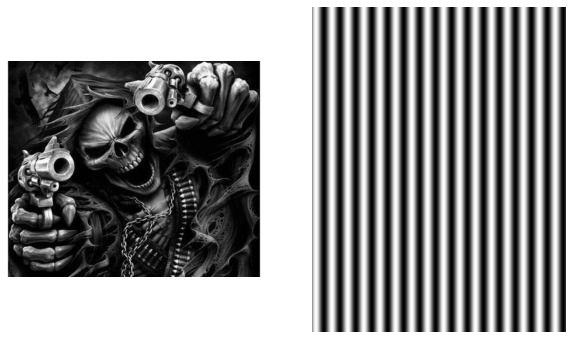

In [11]:
img1 = io.imread("мало2.jpg", True)
img2 = io.imread("средне2.jpg", True)
img3 = io.imread("много1.png", True)
img4 = interpolation(createImage(sampling(0.1)), img1.shape)

showImages(img1, img2)
showImages(img3, img4)

In [12]:

# Квантование изображений
img1_q2 = quantization(img1.copy(), 0, 1, 2)
img1_q4 = quantization(img1.copy(), 0, 1, 4)
img1_q16 = quantization(img1.copy(), 0, 1, 16)
img1_q64 = quantization(img1.copy(), 0, 1, 64)
img1_q128 = quantization(img1.copy(), 0, 1, 128)

img2_q2 = quantization(img2.copy(), 0, 1, 2)
img2_q4 = quantization(img2.copy(), 0, 1, 4)
img2_q16 = quantization(img2.copy(), 0, 1, 16)
img2_q64 = quantization(img2.copy(), 0, 1, 64)
img2_q128 = quantization(img2.copy(), 0, 1, 128)

img3_q2 = quantization(img3.copy(), 0, 1, 2)
img3_q4 = quantization(img3.copy(), 0, 1, 4)
img3_q16 = quantization(img3.copy(), 0, 1, 16)
img3_q64 = quantization(img3.copy(), 0, 1, 64)
img3_q128 = quantization(img3.copy(), 0, 1, 128)

img4_q2 = quantization(img4.copy(), 0, 1, 2)
img4_q4 = quantization(img4.copy(), 0, 1, 4)
img4_q16 = quantization(img4.copy(), 0, 1, 16)
img4_q64 = quantization(img4.copy(), 0, 1, 64)
img4_q128 = quantization(img4.copy(), 0, 1, 128)

In [13]:
# showImages(img1_q2, img1)

In [14]:

img1_rd = random_dither(img1)
img1_cd = control_dither(img1)

img2_rd = random_dither(img2)
img2_cd = control_dither(img2)

img3_rd = random_dither(img3)
img3_cd = control_dither(img3)

img4_rd = random_dither(img4)
img4_cd = control_dither(img4)

In [15]:
# showImages(img1_rd, img1)

In [16]:
def count_metrics(*args, deffault_img):
    MSE = []
    PSNR = []
    SSIM = []
    table = PrettyTable()
    table.field_names = ["№", "Изображение", "MSE", "PSNR", "SSIM"]

    deffault_img = np.around(255 * deffault_img)

    for i in range(len(args)):        
        #Расчет показателей  
        mse = round(metrics.mean_squared_error(deffault_img, np.around(255 * args[i])) / 255, 3) 
        psnr = round(metrics.peak_signal_noise_ratio(deffault_img, np.around(255 * args[i]), data_range=255), 3)
        ssim = round(metrics.structural_similarity(deffault_img, np.around(255 * args[i]), multichannel=True), 3)

        MSE.append(mse)
        PSNR.append(psnr)
        SSIM.append(ssim)

        temp = []   #строка таблицы 
        temp.append(i+1)
        temp.append("1" + str(i*2))
        temp.extend((mse, psnr, ssim))
        table.add_row(temp)

    print(table)

    fig, axes = plt.subplots(3, 1)

    axes[0].plot(np.arange(len(MSE)), np.array(MSE), linewidth = 3)
    axes[0].grid()
    axes[0].set_title("MSE")

    axes[1].plot(np.arange(len(PSNR)), np.array(PSNR))
    axes[1].grid()
    axes[1].set_title("PSNR")

    axes[2].plot(np.arange(len(SSIM)), np.array(SSIM))
    axes[2].grid()
    axes[2].set_title("SSIM")

    fig.set_figwidth(12)    
    fig.set_figheight(14)  
    plt.show()

C:\Temp/ipykernel_2604/597165618.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = round(metrics.structural_similarity(deffault_img, np.around(255 * args[i]), multichannel=True), 3)
c:\Users\Shrek\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


+---+-------------+--------+--------+-------+
| № | Изображение |  MSE   |  PSNR  |  SSIM |
+---+-------------+--------+--------+-------+
| 1 |      10     | 7.002  | 15.613 | 0.069 |
| 2 |      12     | 1.309  | 22.895 | 0.138 |
| 3 |      14     | 0.084  | 34.841 | 0.633 |
| 4 |      16     | 0.006  | 46.403 | 0.955 |
| 5 |      18     | 0.002  | 51.162 | 0.989 |
| 6 |     110     | 23.73  | 10.312 |  0.0  |
| 7 |     112     | 25.821 | 9.946  | 0.016 |
+---+-------------+--------+--------+-------+


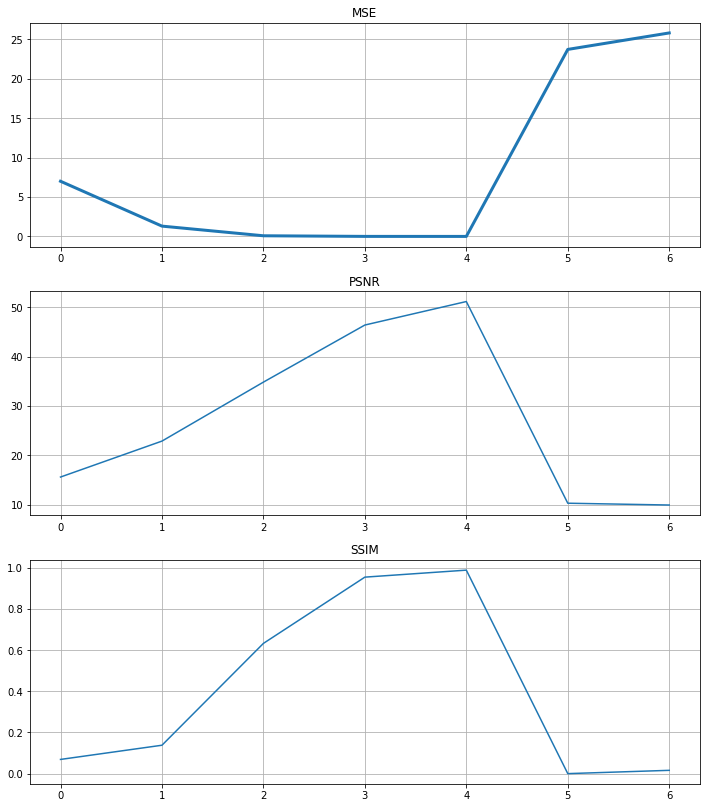

In [17]:
# count_metrics(img1_q2, img1_q4, img1_q16, img1_q64, img1_q128, img1_rd, img1_cd, deffault_img=img1)

count_metrics(img2_q2, img2_q4, img2_q16, img2_q64, img2_q128, img2_rd, img2_cd, deffault_img=img2)
# 
# count_metrics(img3_q2, img3_q4, img3_q16, img3_q64, img3_q128, img3_rd, img3_cd, deffault_img=img3)

# count_metrics(img4_q2, img4_q4, img4_q16, img4_q64, img4_q128, img4_rd, img4_cd, deffault_img=img4)